* [Nice talk on recommentation system by Nicolas Hug](https://youtu.be/z0dx-YckFko) and his blog [here](http://nicolas-hug.com/blog/matrix_facto_1)

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_olivetti_faces
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

rng = np.random.RandomState(95)

In [2]:
dataset, _ = fetch_olivetti_faces(shuffle=True, random_state=rng, return_X_y=True)

In [3]:
dataset.shape

(400, 4096)

In [4]:
def show_first10(images, axs):
    scaler = MinMaxScaler()
    for j in range(10):
        images = images.copy()
        images = images.transpose((1, 0))
        images = scaler.fit_transform(images)
        images = images.transpose((1, 0))
        axs[j].imshow(images[j].reshape((64, 64)))

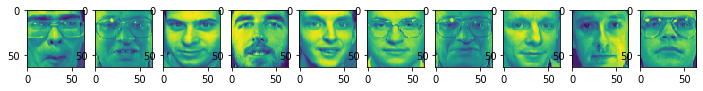

In [5]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))

show_first10(dataset, axs)

## PCA

In [6]:
n_components = 10

X = dataset

In [7]:
pca = PCA(n_components=n_components)
pca.fit(X)

PCA(n_components=10)

In [8]:
pca.explained_variance_ratio_, pca.explained_variance_ratio_.sum()

(array([0.23812738, 0.13993986, 0.07968619, 0.04998334, 0.03609845,
        0.03156941, 0.0242683 , 0.02036399, 0.01958115, 0.01672122],
       dtype=float32), 0.6563393)

In [9]:
pca.components_.shape

(10, 4096)

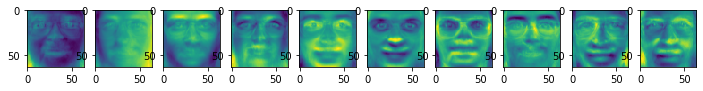

In [10]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))
show_first10(pca.components_, axs)

In [11]:
X_reduced = pca.transform(X)
X_reduced.shape

(400, 10)

In [12]:
X_restored = pca.inverse_transform(X_reduced)
X_restored.shape

(400, 4096)

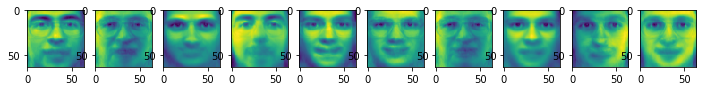

In [13]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))
show_first10(X_restored, axs)

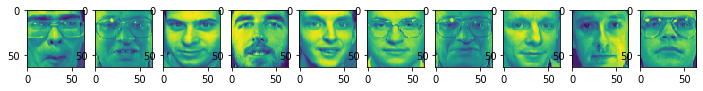

In [14]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))

show_first10(dataset, axs)

### How many components do we need?

In [16]:
n_components = np.linspace(10, 100, 10, dtype=np.int)
n_components

array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100])

In [23]:
X_comp = []
for n_comp in n_components:
    pca = PCA(n_components=n_comp)
    pca.fit(X)
    X_reduced = pca.transform(X[:1, :])
    X_restored = pca.inverse_transform(X_reduced)
    X_comp.append(X_restored.squeeze())

In [27]:
X_comp = np.stack(X_comp)
X_comp.shape

(10, 4096)

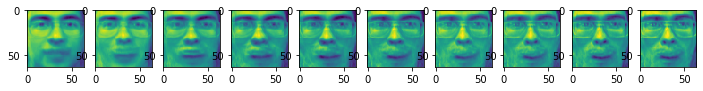

In [28]:
fig, axs = plt.subplots(1, 10, figsize=(12, 2))

show_first10(X_comp, axs)